# **Task-3: Correlation Power Analysis on Simulated Power Traces**

In the last assignment, you learnt how to simulate power traces. In this assignment, you shall be provided with simulated trace files. You have to perform the Correlation Power Analysis (CPA) attack on these traces. The same attack was performed in the "IoT Goes Nuclear" paper and in several other practial scenarios.

In the theory sessions, we have discussed the CPA attack algorithm. In this assignment you will be implementing the same. An illustration of the algorithm is given below. You are also provided with some slides (in .pdf).

![alt text](https://drive.google.com/uc?id=1cAEVQuBQObby2ylaUS40n_cGmWlx2AXU)

# **Download the Prerequisites**

In [ ]:
!wget "https://tinyurl.com/y2lttorc"
!unzip y2lttorc
!rm y2lttorc

!wget "https://tinyurl.com/y596slbw"
!unzip y596slbw
!rm y596slbw

!wget "https://tinyurl.com/yywympeh"
!unzip yywympeh
!rm yywympeh

!wget "https://tinyurl.com/yy6ucxdz"
!unzip yy6ucxdz
!rm yy6ucxdz

!wget "https://tinyurl.com/y3aerc86"
!unzip y3aerc86
!rm y3aerc86

--2024-09-29 08:26:15--  https://tinyurl.com/y2lttorc
Resolving tinyurl.com (tinyurl.com)... 104.18.111.161, 104.17.112.233, 2606:4700::6812:6fa1, ...
Connecting to tinyurl.com (tinyurl.com)|104.18.111.161|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1-vx_HVB1yi-lqzptBRgVxpJsfwa7I-s3 [following]
--2024-09-29 08:26:15--  https://drive.google.com/uc?export=download&id=1-vx_HVB1yi-lqzptBRgVxpJsfwa7I-s3
Resolving drive.google.com (drive.google.com)... 172.253.62.100, 172.253.62.101, 172.253.62.139, ...
Connecting to drive.google.com (drive.google.com)|172.253.62.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1-vx_HVB1yi-lqzptBRgVxpJsfwa7I-s3&export=download [following]
--2024-09-29 08:26:15--  https://drive.usercontent.google.com/download?id=1-vx_HVB1yi-lqzptBRgVxpJsfwa7I-s3&export=download
Resolving drive.user

# **Instructions**

# **Part 1: Implement CPA Algorithm**
In the following code cell:

1. Replace "Your_code" at **line no. 60 and 61** with correct integer values.

2. Replace "Your_code" at **line no. 69, 71, 73, and 74** with proper expressions. **line no. 71** is for HW leakage model, and **line no. 73, 74** are for HD leakage model.

3. Run the code on noise-free traces with HW leakage model (default) and report the correct key value printed on the console. Also, carefully observe the plot generated.

# **The CPA Code**

correct_key_byte = 0xd0


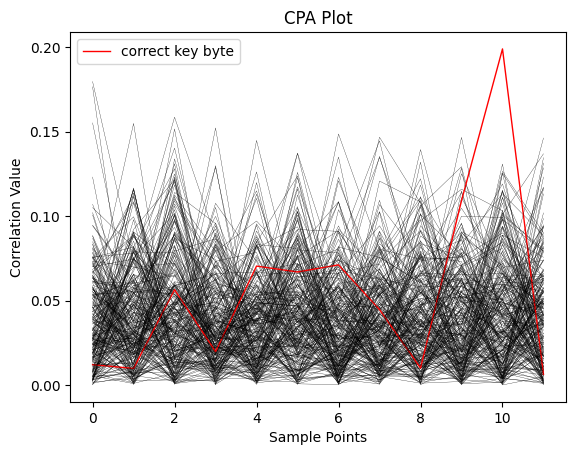

In [ ]:
import math
import numpy as np
import scipy
import random
import csv
import matplotlib.pyplot as plt
from aes_cpa import *

Your_code = 5

# Compute the HW of an integer
def HW(val):
	h = 0
	while( not(val == 0) ):
		v = val%2
		h = h + v
		val = int(val/2)
	return h


filename = 'trace_file_hw.csv'

numTraces = 400			    # Number of traces used for attack
leakage_model = 0			# leakage_model = 0 --> HW; leakage_model = 1 --> HD
target_byte = 0
target_byte_acc = target_byte
wlen = 12

cipher = AES()
cipher.KeyExpansion()




# Initialize necessary data structures
hypo_vector = np.zeros(numTraces,dtype='float')
pt_vector = np.zeros(numTraces,dtype='float')
trace = np.zeros((numTraces,wlen),dtype='float')
ct_list = []

########################################################################
# Read the trace file
########################################################################

with open(filename, mode='r') as trace_file:
	i = 0
	trace_reader = csv.reader(trace_file, delimiter=',')
	for row in trace_reader:
		ct_list.append(hexstringtointarray(row[0]))
		trace[i, :] = row[1:13]
		i = i + 1
		if i == numTraces: break
########################################################################



########################################################################
# Perform the CPA
########################################################################
numrow = 256       # Number of rows in the correlation matrix
numcol = wlen	   # Number of columns in the correlation matrix

corr_matrix=np.zeros((numrow,numcol),dtype='float')	# Initialize the correlation matrix
for c in range(numcol):
	for r in range(0,numrow,1):
		for j in range(numTraces):
			ct = ct_list[j]
			ct_temp = ct[target_byte_acc]
			btemp = cipher.sbox_inv[ct_temp^r]
			if (leakage_model == 0):
				hypo_vector[j]=	HW(btemp)
			else:
				btemp_hd=btemp^ct_temp
				hypo_vector[j]=	HW(btemp_hd)
		pt_vector=trace[:,c]

		if (len(set(pt_vector)) > 1):
			val=np.corrcoef(hypo_vector,pt_vector)
			corr_matrix[r][c]=(abs)(val[0][1])
		else:
			val = 0
			corr_matrix[r][c]= val



# Find the row containing the max correaltion value. The key with max. correlation value is the correct key
maxval = 0
for i in range(numrow):
    row=corr_matrix[i,:]
    if(maxval < max(row)):
        maxval = max(row)
        correct_key = i
        correct_row = row

print ("correct_key_byte = " + str(hex(correct_key)) )
########################################################################



########################################################################
# Print the correlation values for all the keys and all the points of interest
########################################################################

fig, ax1=plt.subplots()
for i in range(256):
    if(i==correct_key):
        plt.plot(range(wlen),correct_row,'r',linewidth=1.0,label="correct key byte")
    else:
        plt.plot(range(wlen),corr_matrix[i,:],'k',linewidth=0.2,)

ax1.legend()
plt.locator_params(axis='y', nbins=5)
plt.title('CPA Plot')
plt.xlabel('Sample Points')
plt.ylabel('Correlation Value')
plt.show()

########################################################################

# **Part 2: Perform CPA on Noise-free HD Traces**
In the following code cell:

1. Copy the previous code cell below this text cell. (Right click on the code cell and select "copy cell". Then press "Ctrl+V". Finally, if required, use the down arrow at the upper right corner of the copied cell to move it down.)  

2. Change line no. 21 to:

> `filename = 'trace_file_hd.csv'`

3. Change line no. 24 to:

> `leakage_model = 1`


> This runs the code for HD leakage model.


4. Run the code.

correct_key_byte = 0xd0


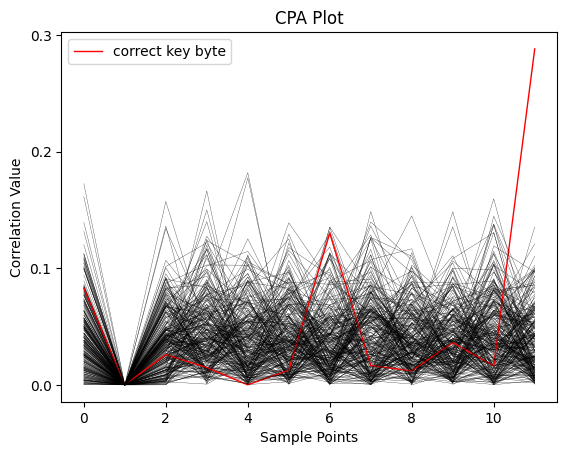

In [ ]:
import math
import numpy as np
import scipy
import random
import csv
import matplotlib.pyplot as plt
from aes_cpa import *

Your_code = 5

# Compute the HW of an integer
def HW(val):
	h = 0
	while( not(val == 0) ):
		v = val%2
		h = h + v
		val = int(val/2)
	return h


filename = 'trace_file_hd.csv'

numTraces = 400			    # Number of traces used for attack
leakage_model = 1			# leakage_model = 0 --> HW; leakage_model = 1 --> HD
target_byte = 0
target_byte_acc = target_byte
wlen = 12

cipher = AES()
cipher.KeyExpansion()




# Initialize necessary data structures
hypo_vector = np.zeros(numTraces,dtype='float')
pt_vector = np.zeros(numTraces,dtype='float')
trace = np.zeros((numTraces,wlen),dtype='float')
ct_list = []

########################################################################
# Read the trace file
########################################################################

with open(filename, mode='r') as trace_file:
	i = 0
	trace_reader = csv.reader(trace_file, delimiter=',')
	for row in trace_reader:
		ct_list.append(hexstringtointarray(row[0]))
		trace[i, :] = row[1:13]
		i = i + 1
		if i == numTraces: break
########################################################################



########################################################################
# Perfrom the CPA
########################################################################
numrow = 256       # Number of rows in the correlation matrix (Fill in here)
numcol = wlen	   # Number of columns in the correlation matrix (Fill in here)

corr_matrix=np.zeros((numrow,numcol),dtype='float')	# Initialize the correlation matrix
for c in range(numcol):
	for r in range(0,numrow,1):
		for j in range(numTraces):
			ct = ct_list[j]
			ct_temp = ct[target_byte_acc] & 0xff
			btemp = cipher.sbox_inv[ct_temp^r]		# Fill in here #
			if (leakage_model == 0):
				hypo_vector[j]=	HW(btemp) # Fill in here	#
			else:
				btemp_hd=btemp^ct_temp		# Fill in here	#
				hypo_vector[j]=	HW(btemp_hd)	# Fill in here	#
		pt_vector=trace[:,c]

		if (len(set(pt_vector)) > 1):
			val=np.corrcoef(hypo_vector,pt_vector)
			corr_matrix[r][c]=(abs)(val[0][1])
		else:
			val = 0
			corr_matrix[r][c]= val



# Find the row containing the max correaltion value. The key with max. correlation value is the correct key
maxval = 0
for i in range(numrow):
    row=corr_matrix[i,:]
    if(maxval < max(row)):
        maxval = max(row)
        correct_key = i
        correct_row = row

print ("correct_key_byte = " + str(hex(correct_key)) )
########################################################################



########################################################################
# Print the correlation values for all the keys and all the points of interest
########################################################################

fig, ax1=plt.subplots()
for i in range(256):
    if(i==correct_key):
        plt.plot(range(wlen),correct_row,'r',linewidth=1.0,label="correct key byte")
    else:
        plt.plot(range(wlen),corr_matrix[i,:],'k',linewidth=0.2,)

ax1.legend()
plt.locator_params(axis='y', nbins=5)
plt.title('CPA Plot')
plt.xlabel('Sample Points')
plt.ylabel('Correlation Value')
plt.show()

########################################################################

# **Part 3: Perform CPA on Noisy Traces**
In the following code cell:

1. Copy the previous code cell below this text cell. (Right click on the code cell and select "copy cell". Then press "Ctrl+V". Finally, if required, use the down arrow at the upper right corner of the copied cell to move it down.)  

2. Change line no. 21 to:

> `filename = 'trace_file_hw_noisy.csv'`

3. Change line no. 24 to:

> `leakage_model = 0`


4. Run the code. You may not recover the correct key byte value (the correct is the one you recovered with noise-free traces).

5. Increase the number of traces at line no. 23:
(`numTraces = 400`) to by 100 (i.e. make it 500).

6. Observe the impact.

7. Continue increasing the number of traces until you recover the correct key byte.

8. One you are done with the HW traces, create another code cell and repeat the experiment for noisy HD traces.



correct_key_byte = 0xef


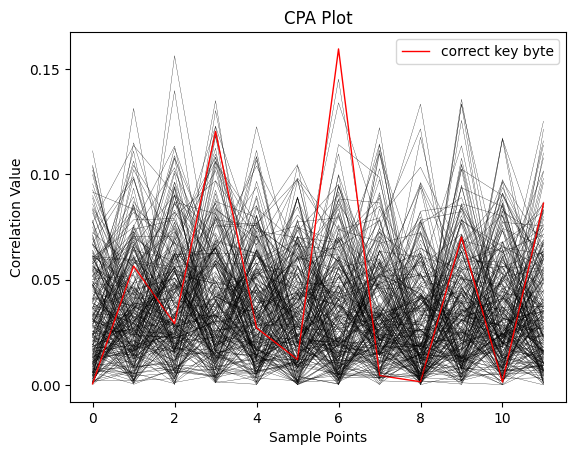

In [ ]:
import math
import numpy as np
import scipy
import random
import csv
import matplotlib.pyplot as plt
from aes_cpa import *

Your_code = 5

# Compute the HW of an integer
def HW(val):
	h = 0
	while( not(val == 0) ):
		v = val%2
		h = h + v
		val = int(val/2)
	return h


filename = 'trace_file_hw_noisy.csv'

numTraces = 500			    # Number of traces used for attack
leakage_model = 0			# leakage_model = 0 --> HW; leakage_model = 1 --> HD
target_byte = 0
target_byte_acc = target_byte
wlen = 12

cipher = AES()
cipher.KeyExpansion()




# Initialize necessary data structures
hypo_vector = np.zeros(numTraces,dtype='float')
pt_vector = np.zeros(numTraces,dtype='float')
trace = np.zeros((numTraces,wlen),dtype='float')
ct_list = []

########################################################################
# Read the trace file
########################################################################

with open(filename, mode='r') as trace_file:
	i = 0
	trace_reader = csv.reader(trace_file, delimiter=',')
	for row in trace_reader:
		ct_list.append(hexstringtointarray(row[0]))
		trace[i, :] = row[1:13]
		i = i + 1
		if i == numTraces: break
########################################################################



########################################################################
# Perfrom the CPA
########################################################################
numrow = 256       # Number of rows in the correlation matrix (Fill in here)
numcol = wlen	   # Number of columns in the correlation matrix (Fill in here)

corr_matrix=np.zeros((numrow,numcol),dtype='float')	# Initialize the correlation matrix
for c in range(numcol):
	for r in range(0,numrow,1):
		for j in range(numTraces):
			ct = ct_list[j]
			ct_temp = ct[target_byte_acc] & 0xff
			btemp = cipher.sbox_inv[ct_temp^r]		# Fill in here #
			if (leakage_model == 0):
				hypo_vector[j]=	HW(btemp) # Fill in here	#
			else:
				btemp_hd=btemp^ct_temp		# Fill in here	#
				hypo_vector[j]=	HW(btemp_hd)	# Fill in here	#
		pt_vector=trace[:,c]

		if (len(set(pt_vector)) > 1):
			val=np.corrcoef(hypo_vector,pt_vector)
			corr_matrix[r][c]=(abs)(val[0][1])
		else:
			val = 0
			corr_matrix[r][c]= val



# Find the row containing the max correaltion value. The key with max. correlation value is the correct key
maxval = 0
for i in range(numrow):
    row=corr_matrix[i,:]
    if(maxval < max(row)):
        maxval = max(row)
        correct_key = i
        correct_row = row

print ("correct_key_byte = " + str(hex(correct_key)) )
########################################################################



########################################################################
# Print the correlation values for all the keys and all the points of interest
########################################################################

fig, ax1=plt.subplots()
for i in range(256):
    if(i==correct_key):
        plt.plot(range(wlen),correct_row,'r',linewidth=1.0,label="correct key byte")
    else:
        plt.plot(range(wlen),corr_matrix[i,:],'k',linewidth=0.2,)

ax1.legend()
plt.locator_params(axis='y', nbins=5)
plt.title('CPA Plot')
plt.xlabel('Sample Points')
plt.ylabel('Correlation Value')
plt.show()

########################################################################